# Train Stations in Europe analysis

In this notebook a statistical analysis on train stations in Europe will be made. The data contained in the dataset *train_stations_europe.csv* will be used to compute some statistics and to obtain some graphs.

### Dataset columns description:

- id: Numeric internal unique identifier. Primary key. <br /> <br />
- name: Name of the station as it is locally known. These names include accents and other special characters. <br /> <br />
- name_norm: Normalised version of name; transformed into [A-Za-z] character space (aka 'Latin-ASCII') to replace special characters with their standard-Latin counterparts (e.g. è become e, ü becomes u). <br /> <br />
- uic: The UIC code of the station. UIC is the International Union of Railways, "an international rail transport industry body". About 1/3 of all stations have no UIC code in this dataset. <br /> <br />
- longitude & latitude: Station coordinates. About 5% of all stations have no coordinates in this dataset. <br /> <br />
- parent_station_id: A station can belong to a meta station whose id is this value, i.e. Paris Gare d’Austerlitz (id = 4921) belongs to the meta-station Paris (id = 4916). About 92% of rows have NA entries. <br /> <br />
- country: Country codes in ISO 3166-1 alpha-2 format (2 digits). <br /> <br />
- time_zone: Continent/Country ISO codes. Those appear to be equivalent to Olson names (e.g. "Europe/Berlin"). <br /> <br />
- is_city: Marked as "unreliable" in the source dataset. Might be worth investigating what exactly that means. <br /> <br />
- is_main_station: Marked as "unreliable" in the source dataset. Might be worth investigating what exactly that means.

### Import libraries

We have to import some libraries which will be used in the code later:<br />
- numpy: perform powerful and efficient operation with numpy array <br />
- pandas: perform powerful and efficient operation on dataframe <br />
- math: perform mathematical operation <br />
- pyplot: perform data plots

In [48]:
import numpy as np
import pandas as pd                             
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

### Read data
We first read the .csv file, then show the first elements in the dataset to see how it is built using pandas "head" function.

In [30]:
stations = pd.read_csv('train_stations_europe.csv', delimiter = ',')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_row', None)
stations.head()

,id,name,name_norm,uic,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport,entur_id,entur_is_enabled
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,NaN,44.081790,6.001625,NaN,FR,Europe/Paris,True,False,False,NaN,False
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,8775123.0,44.061565,5.997373,1.0,FR,Europe/Paris,False,True,False,NaN,False
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,8775122.0,44.063863,6.011248,1.0,FR,Europe/Paris,False,False,False,NaN,False
3,4,Digne-les-Bains,Digne-les-Bains,NaN,44.350000,6.350000,NaN,FR,Europe/Paris,True,False,False,NaN,False
4,6,Digne-les-Bains,Digne-les-Bains,8775149.0,44.088710,6.222982,4.0,FR,Europe/Paris,False,True,False,NaN,False


### Clean data

I eliminate the last two columns _entur_id_, _entur_is_enabled_ because their meanings are not specified clearly. So they cannot be considered useful.

In [31]:
stations = stations.drop(['entur_id', 'entur_is_enabled'], axis = 1)
stations.head()

,id,name,name_norm,uic,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,NaN,44.081790,6.001625,NaN,FR,Europe/Paris,True,False,False
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,8775123.0,44.061565,5.997373,1.0,FR,Europe/Paris,False,True,False
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,8775122.0,44.063863,6.011248,1.0,FR,Europe/Paris,False,False,False
3,4,Digne-les-Bains,Digne-les-Bains,NaN,44.350000,6.350000,NaN,FR,Europe/Paris,True,False,False
4,6,Digne-les-Bains,Digne-les-Bains,8775149.0,44.088710,6.222982,4.0,FR,Europe/Paris,False,True,False


Now I want to rewrite the _country_ columns, to clarify better what correspond to all the abbreviations (in the original dataset, countries are written as codes in ISO 3166-1 alpha-2 format 2 digits). To do this, I use another one dataset, in which there are matches between code and full name of the country.

In [32]:
iso_countries = pd.read_csv('iso_countries.csv', delimiter = ',')
iso_countries

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


At this point, a Merge between the two DataFrame _stations_ and _iso_countries_ is possible. The Merge is made across the country code column.

In [33]:
iso_countries.rename(columns = {'Code':'country'}, inplace = True)

stations = pd.merge(stations, iso_countries, on = 'country')
stations.head()

,id,name,name_norm,uic,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport,Name
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,NaN,44.081790,6.001625,NaN,FR,Europe/Paris,True,False,False,France
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,8775123.0,44.061565,5.997373,1.0,FR,Europe/Paris,False,True,False,France
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,8775122.0,44.063863,6.011248,1.0,FR,Europe/Paris,False,False,False,France
3,4,Digne-les-Bains,Digne-les-Bains,NaN,44.350000,6.350000,NaN,FR,Europe/Paris,True,False,False,France
4,6,Digne-les-Bains,Digne-les-Bains,8775149.0,44.088710,6.222982,4.0,FR,Europe/Paris,False,True,False,France


In [34]:
stations = stations.drop(['country'], axis = 1)
stations.rename(columns = {'Name':'country'}, inplace = True)

# I reorder the columns in a specific way I prefer
columnsOrder = ['id', 'name', 'name_norm', 'latitude', 'longitude', 'country', 'time_zone',
                'uic', 'parent_station_id', 'is_city', 'is_main_station', 'is_airport']
stations = stations.reindex(columns = columnsOrder)
stations.head()

,id,name,name_norm,latitude,longitude,country,time_zone,uic,parent_station_id,is_city,is_main_station,is_airport
0,1,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,44.081790,6.001625,France,Europe/Paris,NaN,NaN,True,False,False
1,2,Château-Arnoux—St-Auban,Chateau-Arnoux-St-Auban,44.061565,5.997373,France,Europe/Paris,8775123.0,1.0,False,True,False
2,3,Château-Arnoux Mairie,Chateau-Arnoux Mairie,44.063863,6.011248,France,Europe/Paris,8775122.0,1.0,False,False,False
3,4,Digne-les-Bains,Digne-les-Bains,44.350000,6.350000,France,Europe/Paris,NaN,NaN,True,False,False
4,6,Digne-les-Bains,Digne-les-Bains,44.088710,6.222982,France,Europe/Paris,8775149.0,4.0,False,True,False


<br />

## Data analysis

**Print total number of train stations in Europe**

In [124]:
print('Total number of European train stations collected into this dataset is', stations.name.count())

Total number of European train stations collected into this dataset is 63832


In [130]:
print('Total number of "unique" European train stations collected into this dataset is', stations.name.nunique())

Total number of "unique" European train stations collected into this dataset is 62880


<br />

**Pivot table displaying the numbers of stations for each country**

In [192]:
stations_per_countries = stations.pivot_table('name', index = 'country', aggfunc = 'count')
stations_per_countries.rename(columns = {'name':'n° of stations'}, inplace = True)
display(stations_per_countries)

,n° of stations
country,
Albania,6
Andorra,10
Austria,1710
Belarus,20
Belgium,584
Bosnia and Herzegovina,131
Bulgaria,165
Croatia,705
Cyprus,8


<br />

**Displaying the numbers of stations for each country without pivot table**

In [160]:
stations_per_countries = stations.groupby('country')[['id']].count()
stations_per_countries.rename(columns = {'id':'n° of stations'}, inplace = True)
display(stations_per_countries)

,n° of stations
country,
Albania,6
Andorra,10
Austria,1710
Belarus,20
Belgium,584
Bosnia and Herzegovina,131
Bulgaria,165
Croatia,705
Cyprus,8


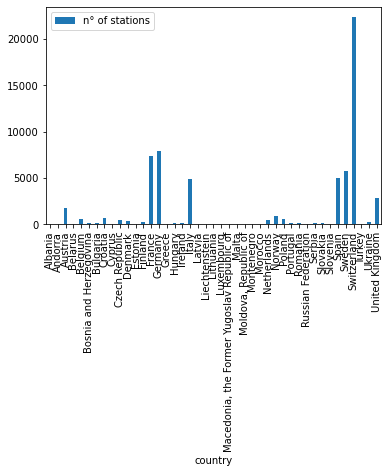

In [286]:
countries_list = stations.country.unique()
countries_list.sort()
#print(countries_list)
#print()
countries_occurrences = stations.groupby('country')['id'].count().values
#print(countries_occurrences)

df = pd.DataFrame({'country':countries_list, 'n° of stations':countries_occurrences})
df
ax = df.plot.bar(x = 'country', y = 'n° of stations', rot = 90)

#meglio perché si può gestire grandezza ma non riesco a ruotare nomi paesi
#fig = plt.figure()
#ax = fig.add_axes([0,0,2,2])
#ax.bar(countries_list,countries_occurrences)
#plt.show()

In [37]:
#index = pd.where(max(stations_per_countries))
#stations_per_countries(index)

In [46]:
stations.info() #data types of each attribute

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63832 entries, 0 to 63831
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 63832 non-null  int64  
 1   name               63832 non-null  object 
 2   name_norm          63832 non-null  object 
 3   latitude           61936 non-null  float64
 4   longitude          61936 non-null  float64
 5   country            63832 non-null  object 
 6   time_zone          63832 non-null  object 
 7   uic                24170 non-null  float64
 8   parent_station_id  3520 non-null   float64
 9   is_city            63832 non-null  bool   
 10  is_main_station    63832 non-null  bool   
 11  is_airport         63832 non-null  bool   
dtypes: bool(3), float64(4), int64(1), object(4)
memory usage: 5.1+ MB


In [42]:
stations.isnull().sum() #check for missing values

id                       0
name                     0
name_norm                0
latitude              1896
longitude             1896
country                  0
time_zone                0
uic                  39662
parent_station_id    60312
is_city                  0
is_main_station          0
is_airport               0
dtype: int64

In [115]:
index = (stations.latitude.isnull()) #stampo le stazioni senza latitude e longitude
stations[index]

,id,name,name_norm,latitude,longitude,country,time_zone,uic,parent_station_id,is_city,is_main_station,is_airport
11,16,Vievola,Vievola,NaN,NaN,France,Europe/Paris,NaN,NaN,True,False,False
12,17,Vievola,Vievola,NaN,NaN,France,Europe/Paris,8300618.0,16.0,False,False,False
101,129,Croix,Croix,NaN,NaN,France,Europe/Paris,NaN,NaN,True,False,False
124,162,Thann,Thann,NaN,NaN,France,Europe/Paris,NaN,NaN,True,False,False
155,198,St-Hilaire-de-Riez,St-Hilaire-de-Riez,NaN,NaN,France,Europe/Paris,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53413,28521,Katowice,Katowice,NaN,NaN,Poland,Europe/Warsaw,NaN,NaN,False,False,False
53938,22731,Budapest,Budapest,NaN,NaN,Hungary,Europe/Budapest,5510009.0,NaN,False,False,False
54696,28697,Opatija-Matulji,Opatija-Matulji,NaN,NaN,Croatia,Europe/Zagreb,7244911.0,NaN,False,False,False
61524,22732,Dobova,Dobova,NaN,NaN,Slovenia,Europe/Ljubljana,7942000.0,NaN,False,False,False


<AxesSubplot:>

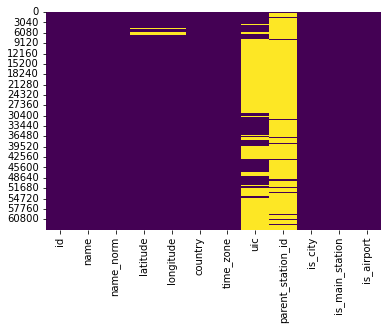

In [50]:
#visualizing the missing values
sns.heatmap(stations.isnull(), cbar = False, cmap = 'viridis')
#With the help of heatmap, we can see the amount of data that is
#missing from the attribute. With this, we can make decisions whether
#to drop these missing values or to replace them. Usually dropping the
#missing values is not advisable but sometimes it may be helpful too.

In [82]:
#print("Latitude: ") #[] da togliere sotto
display(stations.groupby('country')[['latitude']].describe())

latitude                       \
                                              count       mean       std   
country                                                                    
Albania                                         6.0  41.505340  0.351909   
Andorra                                        10.0  42.531800  0.034879   
Austria                                      1542.0  47.735994  0.571875   
Belarus                                        20.0  53.320550  1.309828   
Belgium                                       573.0  50.726684  0.344564   
Bosnia and Herzegovina                        131.0  44.184431  0.593892   
Bulgaria                                      165.0  42.744569  0.645681   
Croatia                                       704.0  44.825477  0.948251   
Cyprus                                          8.0  35.216356  0.170223   
Czech Republic                                464.0  49.783391  0.574541   
Denmark                                       379.0  55.861101  0.588916   
Estonia                                        15.0  58.753032  0.683334   
Finland                                       211.0  61.683352  1.686895   
France                                       6318.0  46.844996  2.205840   
Germany                                      7493.0  50.698102  1.805910   
Greece                                         85.0  39.141181  1.356980   
Hungary                                       171.0  47.199712  0.658410   
Ireland                                       140.0  52.982059  0.816962   
Italy                                        4853.0  42.528970  2.683364   
Latvia                                          8.0  56.613249  0.587897   
Liechtenstein                                   2.0  47.184306  0.022639   
Lithuania                                      83.0  55.170168  0.645938   
Luxembourg                                     66.0  49.652169  0.160796   
Macedonia, the Former Yugoslav Republic of     18.0  42.030464  1.962952   
Malta                                           8.0  35.938157  0.051898   
Moldova, Republic of                            3.0  47.580091  0.699919   
Montenegro                                     19.0  42.506823  0.309423   
Morocco                                        11.0  34.289494  1.220136   
Netherlands                                   434.0  52.130485  0.630041   
Norway                                        856.0  61.059889  2.173422   
Poland                                        526.0  51.827449  1.563945   
Portugal                                      172.0  40.278619  1.696986   
Romania                                       152.0  45.752385  1.133609   
Russian Federation                             27.0  54.136380  5.081952   
Serbia                                        108.0  44.082272  0.932525   
Slovakia                                      114.0  48.721518  0.380349   
Slovenia                                       69.0  46.065788  0.342785   
Spain                                        4958.0  40.821509  2.078392   
Sweden                                       5767.0  58.852302  2.523578   
Switzerland                                 22262.0  46.914369  0.473291   
Turkey                                          3.0  39.791146  1.302328   
Ukraine                                       215.0  49.112028  1.184466   
United Kingdom                               2767.0  52.800294  1.724993   

                                                                             \
                                                  min        25%        50%   
country                                                                       
Albania                                     41.108822  41.323365  41.378567   
Andorra                                     42.465651  42.506455  42.539785   
Austria                                     46.530893  47.277983  47.873566   
Belarus                                     49.445388  52.929320  53.410

In [90]:
#print("Longitude: ") #[] da togliere sotto
display(stations.groupby('country')[['longitude']].describe())

longitude                       \
                                               count       mean       std   
country                                                                     
Albania                                          6.0  19.698530  0.225067   
Andorra                                         10.0   1.559593  0.080420   
Austria                                       1542.0  14.472557  1.686985   
Belarus                                         20.0  26.932542  2.662301   
Belgium                                        573.0   4.484243  0.709282   
Bosnia and Herzegovina                         131.0  17.709612  0.965120   
Bulgaria                                       165.0  25.413573  2.041014   
Croatia                                        704.0  15.971195  1.420489   
Cyprus                                           8.0  33.566832  0.316050   
Czech Republic                                 464.0  15.684271  1.628672   
Denmark                                        379.0  10.829364  1.511048   
Estonia                                         15.0  25.991520  1.665634   
Finland                                        211.0  25.458501  1.951570   
France                                        6318.0   2.881552  2.642457   
Germany                                       7493.0  10.123132  2.192066   
Greece                                          85.0  23.169143  1.628519   
Hungary                                        171.0  18.744134  1.570594   
Ireland                                        140.0  -7.953645  1.025400   
Italy                                         4853.0  12.643425  2.998901   
Latvia                                           8.0  25.268338  1.486702   
Liechtenstein                                    2.0   9.524751  0.023972   
Lithuania                                       83.0  23.819115  1.247358   
Luxembourg                                      66.0   6.083219  0.141339   
Macedonia, the Former Yugoslav Republic of      18.0  21.326328  0.851720   
Malta                                            8.0  14.432880  0.078678   
Moldova, Republic of                             3.0  28.241452  0.995651   
Montenegro                                      19.0  19.132711  0.468689   
Morocco                                         11.0  -6.038659  1.143970   
Netherlands                                    434.0   5.537860  0.772249   
Norway                                         856.0  10.101590  2.218821   
Poland                                         526.0  18.515862  2.453940   
Portugal                                       172.0  -8.032582  1.731289   
Romania                                        152.0  24.810517  2.061903   
Russian Federation                              27.0  33.440469  6.600575   
Serbia                                         108.0  20.744015  0.979957   
Slovakia                                       114.0  19.366909  1.599920   
Slovenia                                        69.0  14.830312  1.021093   
Spain                                         4958.0  -3.557709  2.847156   
Sweden                                        5767.0  14.986384  2.480543   
Switzerland                                  22262.0   8.047437  0.978705   
Turkey                                           3.0  29.655260  2.909634   
Ukraine                                        215.0  28.748922  4.680194   
United Kingdom                                2767.0  -1.760161  1.683541   

                                                                             \
                                                  min        25%        50%   
country                                                                       
Albania                                     19.453887  19.544884  19.677125   
Andorra                                      1.483833   1.517228   1.529956   
Austria                                      9.343971  13.513666  14.573128   
Belarus                   

In [94]:
index = (stations.country == 'Switzerland') #stampo solo le stazioni di un paese
stations[index]

,id,name,name_norm,latitude,longitude,country,time_zone,uic,parent_station_id,is_city,is_main_station,is_airport
7400,811,Basel SBB,Basel SBB,NaN,NaN,Switzerland,Europe/Zurich,8718791.0,5877.0,False,False,False
7401,2848,Le Locle Col des Roches,Le Locle Col des Roches,NaN,NaN,Switzerland,Europe/Zurich,8759821.0,4655.0,False,False,False
7402,3190,Genève Eaux-Vives,Geneve Eaux-Vives,46.200712,6.166044,Switzerland,Europe/Zurich,8774592.0,5335.0,False,False,False
7403,3600,Vallorbe Frontière,Vallorbe Frontiere,46.713550,6.347831,Switzerland,Europe/Zurich,8771591.0,6367.0,False,False,False
7404,4041,Le Trétien,Le Tretien,46.102336,6.997700,Switzerland,Europe/Zurich,8774663.0,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29741,67969,Poschiavo Stazione,Poschiavo Stazione,46.324209,10.054569,Switzerland,Europe/Zurich,NaN,6036.0,False,False,False
29742,67970,Biel/Bienne Bahnhof/Gare,Biel/Bienne Bahnhof/Gare,47.133472,7.243319,Switzerland,Europe/Zurich,NaN,6374.0,False,False,False
29743,67971,Arth-Goldau Bahnhof,Arth-Goldau Bahnhof,47.049171,8.548067,Switzerland,Europe/Zurich,NaN,37337.0,False,False,False
29744,67972,Chur Bahnhofplatz,Chur Bahnhofplatz,46.853072,9.529662,Switzerland,Europe/Zurich,NaN,6378.0,False,False,False


In [144]:
index = (stations.country == 'Italy') #stampo solo le stazioni di un paese
stations[index]

,id,name,name_norm,latitude,longitude,country,time_zone,uic,parent_station_id,is_city,is_main_station,is_airport
43233,4185,Limone-Confine,Limone-Confine,44.201451,7.578914,Italy,Europe/Rome,8775698.0,8477.0,False,False,False
43234,5630,Ventimiglia,Ventimiglia,NaN,NaN,Italy,Europe/Rome,8383322.0,NaN,True,False,False
43235,5671,Ventimiglia Frontière,Ventimiglia Frontiere,43.788164,7.542650,Italy,Europe/Rome,8775690.0,5630.0,False,False,False
43236,8427,Firenze Campo di Marte,Firenze Campo di Marte,43.777574,11.276590,Italy,Europe/Rome,8306900.0,8433.0,False,False,False
43237,8433,Firenze,Firenze,43.772504,11.255100,Italy,Europe/Rome,8399003.0,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48115,67843,Olbia Terranova,Olbia Terranova,40.922622,9.494032,Italy,Europe/Rome,8312902.0,19518.0,False,False,False
48116,67940,Lecce Via Don Bosco,Lecce Via Don Bosco,40.346742,18.166197,Italy,Europe/Rome,NaN,20733.0,False,False,False
48117,67941,Serravalle Outlet,Serravalle Outlet,44.735161,8.837641,Italy,Europe/Rome,NaN,NaN,False,False,False
48118,67942,Bitonto Santi Medici,Bitonto Santi Medici,41.117283,16.697773,Italy,Europe/Rome,NaN,29256.0,False,False,False


In [143]:
index = (stations.name == 'Santuario') #stampo solo la stazione specifica
stations[index]

,id,name,name_norm,latitude,longitude,country,time_zone,uic,parent_station_id,is_city,is_main_station,is_airport
44550,20391,Santuario,Santuario,44.346097,8.435738,Italy,Europe/Rome,8304802.0,NaN,False,False,False
